# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


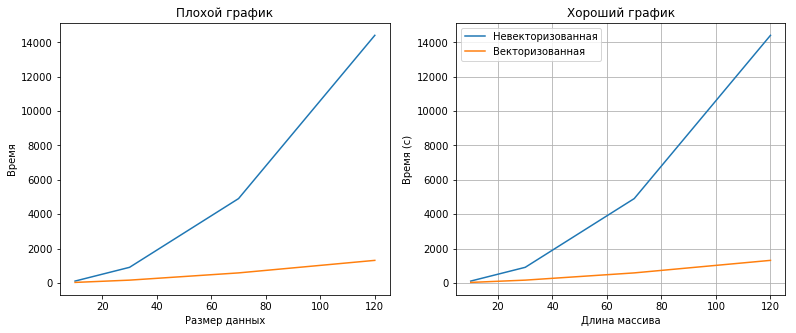

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [12]:
%matplotlib inline

from random import randint
from time import time_ns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def prod_non_zero_diag_vect(x):
    n = x.diagonal()
    m = n[n!=0]
    return np.prod(m)
    pass

def prod_non_zero_diag_non(x):
    pr = 1
    i = 0
    j = 0
    ls = len(x[0])
    while i < len(x) and j < ls:
        if x[i][j] != 0: 
            pr *= x[i][j]
        i+=1
        j+=1
    return pr
    pass

In [14]:
data_size_1 = [x for x in range(1000, 10000, 1000)]
vect_list_1 = list()
non_vect_list_1 = list()

for s in data_size_1:
    X = np.random.randint(-2, 2, (s, s))
    vect_time = %timeit -o prod_non_zero_diag_vect(X)
    non_vect_time = %timeit -o prod_non_zero_diag_non(X)
    vect_list_1.append(vect_time.average * 1000000)
    non_vect_list_1.append(non_vect_time.average * 1000000)
    


13.3 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


C:\Users\Home\AppData\Local\Temp\ipykernel_7556\3208198129.py:14: RuntimeWarning: overflow encountered in scalar multiply
  pr *= x[i][j]


724 µs ± 143 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
32.9 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.17 ms ± 95.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
40.6 µs ± 496 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.66 ms ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
52 µs ± 484 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.29 ms ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
66 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.88 ms ± 69.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
80.5 µs ± 629 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.52 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
98.9 µs ± 7.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.09 ms ± 59.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
112 µs ± 804 ns per loop (mean ± std. dev. of 7 run

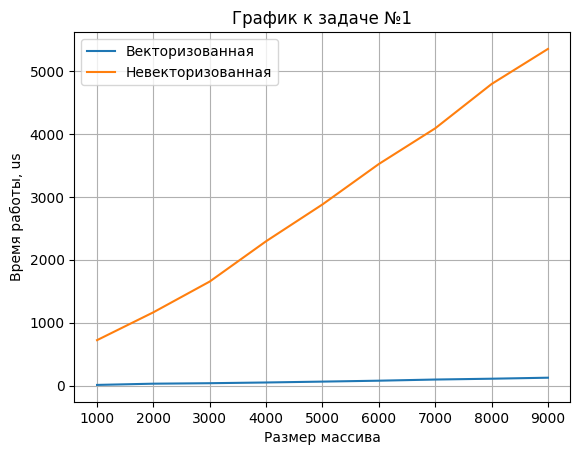

In [15]:
plt.plot(data_size_1, vect_list_1, label=u"Векторизованная")
plt.plot(data_size_1, non_vect_list_1, label=u"Невекторизованная")
plt.xticks(data_size_1)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №1')
plt.grid(True)
plt.legend()
    
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [16]:
def are_multisets_equal(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """
    x.sort()
    y.sort()
    return x == y
    pass

def are_multisets_equal_v(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Vectorized implementation.
    """
    return np.sort(x) == np.sort(y)



In [17]:
data_size = []
time_non_vectorized = []
time_vectorized = []
for _ in range(100):
    #print(_)
    n = (_+1)*(10**4)
    x = [randint(0, 1000) for i in range(n)]
    y = [randint(0, 1000) for i in range(n)]
    data_size.append(n)
    
    xv = np.array(x)
    yv = np.array(y)
    stv = time_ns()/1000
    are_multisets_equal_v(xv, yv)
    etv = time_ns()/1000
    
    st = time_ns()/1000
    are_multisets_equal(x, y)
    et = time_ns()/1000
    
    time_non_vectorized.append(et-st)
    time_vectorized.append(etv-stv)


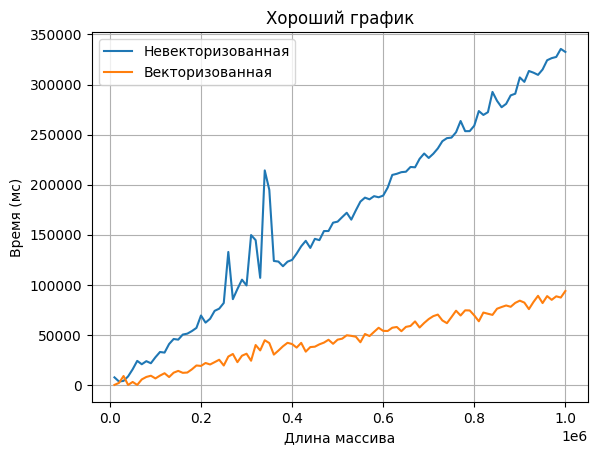

In [18]:
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (мс)")
plt.grid()
plt.legend()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [19]:
def max_after_zero(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Not vectorized implementation.
    """
    ans = 0
    fl = 1
    for i in range(1, len(x)):
        if x[i - 1] == 0 and (fl or x[i] > ans):
            fl = 0
            ans = x[i]
    return ans
    

def max_after_zero_v(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Vectorized implementation.
    """
    a = np.concatenate((np.array([1]), x))[:-1]
    return max(np.where(a == 0, x, 0))


In [20]:
data_size = []
time_non_vectorized = []
time_vectorized = []
for _ in range(100):
    #print(_)
    n = (_+1)*(10**4)
    x = [randint(0, 1000) for i in range(n)]
    
    data_size.append(n)
    
    xv = np.array(x)
    stv = time_ns()/1000
    max_after_zero_v(xv)
    etv = time_ns()/1000
    
    st = time_ns()/1000
    max_after_zero(x)
    et = time_ns()/1000
    
    time_non_vectorized.append(et-st)
    time_vectorized.append(etv-stv)


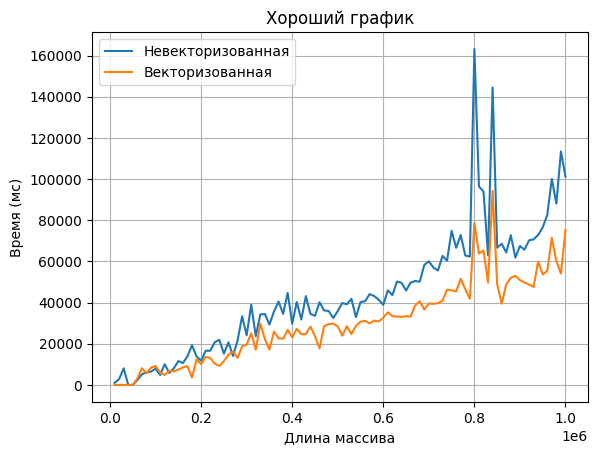

In [21]:
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (мс)")
plt.grid()
plt.legend()
plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [2]:
import numpy as np
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
    'https://zak-zak.ru/images/thumbnails/1110/908/detailed/43/kartina-tsvetnym-peskom-sobaka-43697-43697_toak-ui.jpg',
    "Image2.jpg")

img = Image.open("Image2.jpg")
arr = np.asarray(img, dtype='uint8')
x, y, _ = arr.shape
k = np.array([[[0.2989, 0.587, 0.114]]])
arr2 = np.round(np.sum(arr * k, axis=2)).astype(np.uint8).reshape((x, y))

img2 = Image.fromarray(arr2)
img2.show()

In [4]:
def convert_image_non(img, coefs):
    h = len(img)
    w = len(img[0])
    res = list()
    for i in range(h):
        curr = list()
        for j in range(w):
            sum = 0
            for k in range(len(coefs)):
                sum += img[i][j][k] * coefs[k]
            curr.append(sum)
        res.append(curr)
    return res

    pass


def convert_image_vect(img, coefs):
    return np.sum(img * coefs, axis=-1)

    pass

In [5]:
data_size_4 = [x for x in range(10, 150, 20)]    
vect_list_4 = list()
non_vect_list_4= list()

for size in data_size_4:
    x = np.random.randint(-10, 10, (size,size,size))
    y = np.random.randint(-10,10, size)
    vect_time = %timeit -o convert_image_vect(x,y)
    non_vect_time = %timeit -o convert_image_non(x,y)
    vect_list_4.append(vect_time.average * 1000000)
    non_vect_list_4.append(non_vect_time.average * 1000000)

20 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.18 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
119 µs ± 878 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
31.3 ms ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
430 µs ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
145 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.65 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
404 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.43 ms ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
873 ms ± 27.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.16 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.56 s ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.1 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.71 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


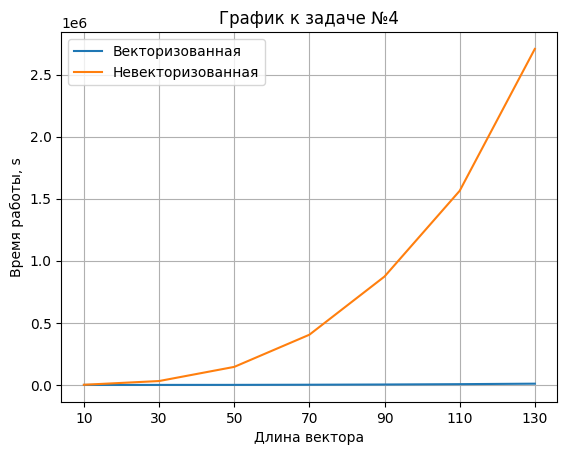

In [7]:
plt.plot(data_size_4, vect_list_4, label=u"Векторизованная")
plt.plot(data_size_4, non_vect_list_4, label=u"Невекторизованная")
plt.xticks(data_size_4)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, s')
plt.title(u'График к задаче №4')
plt.grid(True)
plt.legend()

plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [20]:
def run_length_encoding_vect(x):
    y = np.hstack((np.ones(1), x[:- 1]))
    first_positions = x != y
    first_positions[0] = True
    indexes_1 = np.arange(np.size(x))[first_positions]
    indexes_2 = np.hstack((indexes_1[1:], np.array([np.size(x)])))
    return x[first_positions], indexes_2 - indexes_1

    pass

def run_length_encoding_non(x):
    a = []
    b = []
    x.sort()
    i = 0
    while i < len(x):
        a.append(x[i])
        b.append(x.count(x[i]))
        i += x.count(x[i])

    return (a,b)
    pass

In [21]:
data_size_5 = [x for x in range(1000, 10000, 1000)]    
vect_list_5 = list()
non_vect_list_5= list()

for size in data_size_5:
    x = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o max_after_zero_vect(x)
    non_vect_time = %timeit -o max_after_zero_non(x)
    vect_list_5.append(vect_time.average * 1000000)
    non_vect_list_5.append(non_vect_time.average * 1000000)

17 µs ± 758 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
357 µs ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
18.9 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
723 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
20.1 µs ± 463 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.1 ms ± 5.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
21.9 µs ± 373 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.47 ms ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
23.4 µs ± 554 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.84 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
26.7 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.19 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.2 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.59 ms ± 32.1 µs per loop (mean ± std. dev

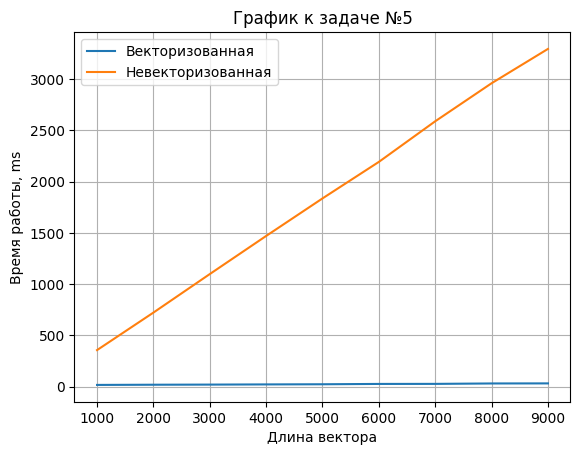

In [22]:
plt.plot(data_size_5, vect_list_5, label=u"Векторизованная")
plt.plot(data_size_5, non_vect_list_5, label=u"Невекторизованная")
plt.xticks(data_size_5)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №5')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [40]:
import math

In [45]:
def pairwise_distance_vect(x, y):
    return np.sqrt(np.sum((x[:, np.newaxis] - y) ** 2, axis=-1))

    pass

def pairwise_distance_non(x, y):
    res = list()
    for i in range(len(x)):
        curr = list()
        for j in range(len(y)):
            dist = 0
            for k in range(len(x[0])):
                dist += (x[i][k] - y[j][k]) ** 2
            curr.append(math.sqrt(dist))
        res.append(curr)
    return res

    pass


In [50]:
from scipy.spatial.distance import cdist

data_size_6 = [x for x in range(10, 150, 20)]  
vect_list_6 = list()
non_vect_list_6 = list()
cdist_list = list()

for size in data_size_6:
    X = np.random.randint(-5, 5, (size, size))
    Y = np.random.randint(-5, 5, (size, size))
    vect_time = %timeit -o pairwise_distance_vect(X, Y)
    non_vect_time = %timeit -o pairwise_distance_non(X, Y)
    cdist_time = %timeit -o cdist(X, Y, metric='euclidean')
    vect_list_6.append(vect_time.average * 1000)
    non_vect_list_6.append(non_vect_time.average * 1000)
    cdist_list.append(cdist_time.average * 1000)

31.7 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.38 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
12.8 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
180 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
35.6 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.6 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
650 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
161 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.27 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
440 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
320 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.35 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
930 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 1 l

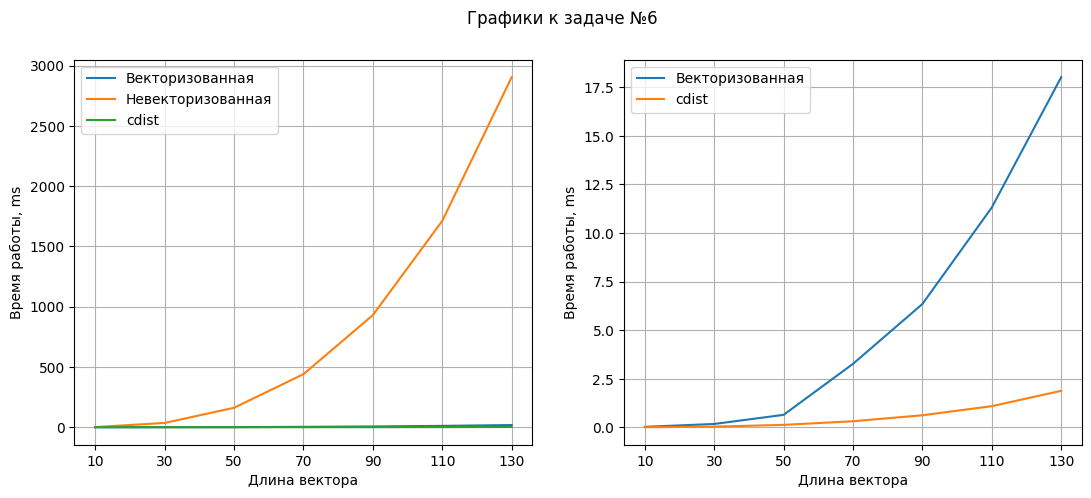

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

fig.suptitle('Графики к задаче №6')
ax1.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax1.plot(data_size_6, non_vect_list_6, label=u"Невекторизованная")
ax1.plot(data_size_6, cdist_list, label='cdist')
ax1.set_xticks(data_size_6)
ax1.set_xlabel(u'Длина вектора')
ax1.set_ylabel(u'Время работы, ms')
ax1.grid(True)
ax1.legend()

ax2.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax2.plot(data_size_6, cdist_list, label='cdist')
ax2.set_xticks(data_size_6)
ax2.set_xlabel(u'Длина вектора')
ax2.set_ylabel(u'Время работы, ms')
ax2.grid(True)
ax2.legend()


plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# *Я вспомнил основы Python*
## Понял, что абсолютно не знаю, как работать с NumPy
### ***Не понимаю я и как строить график для сравнения двух программ одновременно.***
> Однако шаблон для графика я построил и понял, как его редактировать

- [x] Научился 
- [ ] не научился